# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #00000; text-align: center; line-height: 0.75;background-color: #ADD8E6; color: #00000"><b>Natural Language Processing with Disaster Tweets</b><br></h1>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#understanding-data">Import Libraries</a></li>
        <li><a href="https://#reading_data">Data Sets</a></li>
        <li><a href="https://#multiple_regression_model">Functions</a></li>
        <li><a href="https://#prediction">DataSet Cleaning</a></li>
        <li><a href="https://#practice">Pre processing</a></li>
        <li><a href="https://#practice">Modeling</a></li>
         <li><a href="https://#practice">Conclusion</a></li>
         <li><a href="https://#practice">TF-IDF</a></li>
         <li><a href="https://#practice">Summary</a></li>
    </ol>
</div>
<br>
<hr>




# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import string
import re

Pandas and Numpy for Data manipulation.

Matplot for visualization

NLTK, re and string for Data Preprocessing

# 2. Importing DataSets

### 2.1 Train Data

In [2]:
df = pd.read_csv('/Users/macbook/Desktop/DATA SCIENCE/Kaggle notebooks/NLP disaster/train.csv')
#df =pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")

In [3]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


### 2.2 Test Data

In [4]:
test= pd.read_csv('/Users/macbook/Desktop/DATA SCIENCE/Kaggle notebooks/NLP disaster/test.csv')
#test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [5]:
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


# Function

### Process Tweet
To exclude unnecessary words in tweets. 

This includes
* hyperlinks
* hashtags
* any sign

And do preprocessing. Includes
* tokenized
* stopwords
* stemming

In [6]:
def process_tweet(tweet):
    tweet = str(tweet)
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
# remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
# remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
# remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
# remove hashtags
# only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub('[^A-Za-z]+', ' ', tweet)
# tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                           reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
        # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)
    return tweets_clean

In [7]:
def processs_tweet(tweet):
    tweet = str(tweet)
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
# remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
# remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
# remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
# remove hashtags
# only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub('[^A-Za-z]+', ' ', tweet)
   
    words = nltk.word_tokenize(tweet)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [PorterStemmer().stem(word) for word in words if word.lower() not in stop_words]
    cleaned_text = ' '.join(words)
    return cleaned_text


    #return tweets_clean

### Building Vocabulary
In this we assign aunique integer to every possible word in the data set

In [8]:
# Build the vocabulary
# Unit Test Note - There is no test set here only train/val
def get_vocab(train_data):

    # Include special tokens 
    # started with pad, end of line and unk tokens
    Vocab = {'__PAD__': 0, '__</e>__': 1, '__UNK__': 2} 

    # Note that we build vocab using training data
    for tweet in train_data:
        processtweet= process_tweet(tweet)
        for word in processtweet:
            if word not in Vocab: 
                Vocab[word] = len(Vocab)
    
    return Vocab

Vocab = get_vocab(df['text'])

print("Total words in vocab are",len(Vocab))

Total words in vocab are 12542


### Converting strings to Tensors.
Tensors are a integer representation of string words
We can't run models on string so we need to have numeric data set

In [9]:
def tweet_to_tensor(tweet, vocab_dict, unk_token='__UNK__', verbose=False):
    '''
    Input: 
        tweet - A string containing a tweet
        vocab_dict - The words dictionary
        unk_token - The special string for unknown tokens
        verbose - Print info durign runtime
    Output:
        tensor_l - A python list with
        
    '''     
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    # Process the tweet into a list of words
    # where only important words are kept (stop words removed)
    word_l = process_tweet(tweet)
    
    if verbose:
        print("List of words from the processed tweet:")
        print(word_l)
        
    # Initialize the list that will contain the unique integer IDs of each word
    tensor_l = [] 
    
    # Get the unique integer ID of the __UNK__ token
    unk_ID = vocab_dict[unk_token]
    
    if verbose:
        print(f"The unique integer ID for the unk_token is {unk_ID}")
        
    # for each word in the list:
    for word in word_l:
        
        # Get the unique integer ID.
        # If the word doesn't exist in the vocab dictionary,
        # use the unique ID for __UNK__ instead.        
        word_ID = vocab_dict[word] if word in vocab_dict else unk_ID  
        # Append the unique integer ID to the tensor list.
        tensor_l.append(word_ID)
    ### END CODE HERE ###
    
    return tensor_l

# Data Set Cleaning

In [10]:
df['Processed Tweet(array)']= df['text'].apply(process_tweet)
df['Cleaned(not array)']=df['text'].apply(processs_tweet)

Processed tweets are array

Clean tweets are just a strings

In [11]:
df

,id,keyword,location,text,target,Processed Tweet(array),Cleaned(not array)
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[deed, reason, earthquak, may, allah, forgiv, us]",deed reason earthquak may allah forgiv us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, rong, sask, canada]",forest fire near la rong sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[resid, ask, shelter, place, notifi, offic, ev...",resid ask shelter place notifi offic evacu she...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[peopl, receiv, wildfir, evacu, order, califor...",peopl receiv wildfir evacu order california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, rubi, alaska, smoke, wildfi...",got sent photo rubi alaska smoke wildfir pour ...
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,"[two, giant, crane, hold, bridg, collaps, near...",two giant crane hold bridg collaps nearbi home
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,"[aria, ahrari, thetawniest, control, wild, fir...",aria ahrari thetawniest control wild fire cali...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[utc, km, volcano, hawaii]",utc km volcano hawaii
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,"[polic, investig, e, bike, collid, car, littl,...",polic investig e bike collid car littl portug ...


### Data Skewness

<AxesSubplot:>

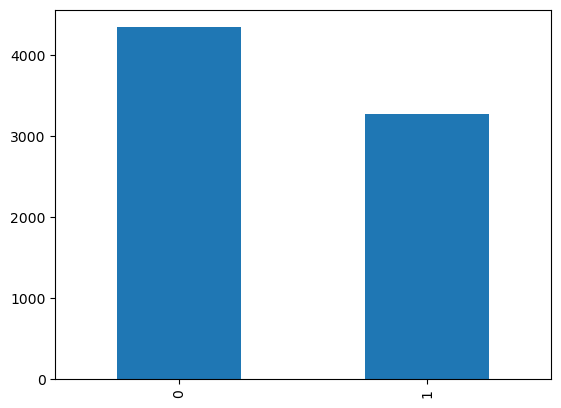

In [12]:
df['target'].value_counts().plot(kind= 'bar')

Data is balanced not much difference in count we can work on it without changing length

### Sneek peek of what we have done so far

In [19]:
train_data = df['text']
test_data = test['text']

In [14]:
print("Actual tweet is\n", train_data[50])
print('\nProcessed Tweet\n', process_tweet(train_data[50]))
print("\nTensor of tweet:\n", tweet_to_tensor(train_data[50], vocab_dict=Vocab))

Actual tweet is
 Deputies: Man shot before Brighton home set ablaze http://t.co/gWNRhMSO8k

Processed Tweet
 ['deputi', 'man', 'shot', 'brighton', 'home', 'set', 'ablaz']

Tensor of tweet:
 [215, 98, 216, 217, 218, 134, 124]


# Pre Processing

### Building Tensors of Data Sets

In [21]:
tensorr_train=[]
tensorr_test=[]
def build_tensor(data):
    a=[]
    for j in range(0,len(data)):
        a.append(tweet_to_tensor(data[j], vocab_dict=Vocab))
    return a

In [22]:
tensorr_train= build_tensor(train_data)

In [23]:
tensorr_test = build_tensor(test_data)


## Padding 

In modeling, Model train on fixed number of inputs but as we can see above tweets are not of same length so tensors.

To overcome this issue we select the tweet with highest length and use the length as standrized length.

If tweet is shorter than strandrized length than we fill it up with zeros
#### Dsadvantage of Padding is we experience vanishing Gradien I will discussed more about later in this note book

In [25]:
#def padding(tensors):
def pad_data(data):
    max_len = max([len(t) for t in data]) 
    max_len
    tensor_pad_l = []
        # Pad shorter tweets with zeros
    for tensor in data:


        ### START CODE HERE (Replace instances of 'None' with your code) ###
            # Get the number of positions to pad for this tensor so that it will be max_len long
        n_pad = max_len- len(tensor)
            
            # Generate a list of zeros, with length n_pad
        pad_l =  [0]*n_pad
            
            # concatenate the tensor and the list of padded zeros
        tensor_pad = tensor + pad_l
            
            # append the padded tensor to the list of padded tensors
        tensor_pad_l.append(tensor_pad)

        # convert the list of padded tensors to a numpy array
        # and store this as the model inputs
    padded =  np.array(tensor_pad_l)
    return padded

In [26]:
train_pad=pad_data(tensorr_train)
train_pad

array([[    3,     4,     5, ...,     0,     0,     0],
       [   10,    11,    12, ...,     0,     0,     0],
       [   17,    18,    19, ...,     0,     0,     0],
       ...,
       [ 7037,  5040,  3993, ...,     0,     0,     0],
       [  164,  3299,  2957, ...,     0,     0,     0],
       [ 1157,   218, 10385, ...,     0,     0,     0]])

In [27]:
test_pad=pad_data(tensorr_test)
test_pad

array([[  63,  724,   95, ...,    0,    0,    0],
       [ 478,    5, 3722, ...,    0,    0,    0],
       [  10,   11, 3187, ...,    0,    0,    0],
       ...,
       [1565, 2495, 4103, ...,    0,    0,    0],
       [8762,  483, 3696, ...,    0,    0,    0],
       [7279, 2164, 7272, ...,    0,    0,    0]])

In [28]:
test_pad.shape

(3263, 24)

In [29]:
train_pad.shape

(7613, 25)

One column is more than in train and there is only one sentence upto this so droping it

In [30]:
train_pad= pd.DataFrame(train_pad)
train_pad=train_pad.drop([24], axis = 1)

In [31]:
train_pad

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,3,4,5,6,7,8,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,11,12,13,14,15,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,17,18,19,20,21,22,23,19,20,24,...,0,0,0,0,0,0,0,0,0,0
3,26,27,28,23,24,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30,31,32,33,34,35,28,36,37,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,158,3267,3564,2017,3538,1333,3565,218,0,0,...,0,0,0,0,0,0,0,0,0,0
7609,12307,12308,12309,1423,1018,11,29,467,1447,1330,...,0,0,0,0,0,0,0,0,0,0
7610,7037,5040,3993,7066,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7611,164,3299,2957,3839,4599,95,712,4682,2957,3839,...,201,3634,434,0,0,0,0,0,0,0


In [32]:
test_pad= pd.DataFrame(test_pad)

In [33]:
test_pad

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,63,724,95,96,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,478,5,3722,259,1584,3992,423,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10,11,3187,10872,2,3470,65,53,595,1031,...,0,0,0,0,0,0,0,0,0,0
3,1084,1338,1431,28,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5177,5179,475,4417,5478,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,5,881,266,267,881,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3259,1155,3481,3482,114,3483,259,292,247,3484,882,...,147,295,477,1034,1904,0,0,0,0,0
3260,1565,2495,4103,187,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3261,8762,483,3696,925,8744,8745,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Modelling

 Using Sci-Kit Learn Libraries for Machine Learning

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize,StandardScaler

### Spliting Data Set

In [62]:
x_train,x_test,y_train,y_test = train_test_split(train_pad,df['target'], test_size = 0.25)

### Building Objeccts of Models

In [36]:
log= LogisticRegression(penalty='l2')
support = SVC()
RF= RandomForestClassifier()
DTC=DecisionTreeClassifier()
Neg= KNeighborsClassifier()

### Funciton to train a model and computing accuracy

In [58]:
def modelling (model, datax,dataxt, datay, datayt):
    model.fit(datax,datay)
    ypred=model.predict(dataxt)
    acc=accuracy_score(ypred, datayt)
    print(acc)
    print(confusion_matrix(ypred, datayt))
    return acc

### Output of Modeling

In [63]:
score=[]
print('Logistic Regression')
score.append(modelling (log, x_train,x_test,y_train,y_test))
print('SVC')
score.append(modelling (support, x_train,x_test,y_train,y_test))
print('RandomForestClassifier')
score.append(modelling (RF, x_train,x_test,y_train,y_test))
print('DecisionTreeClassifier')
score.append(modelling (DTC, x_train,x_test,y_train,y_test))
print('KNeighborsClassifier')
score.append(modelling (Neg, x_train,x_test,y_train,y_test))

Logistic Regression
0.5656512605042017
[[944 692]
 [135 133]]
SVC


/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.592436974789916
[[969 666]
 [110 159]]
RandomForestClassifier
0.6853991596638656
[[879 399]
 [200 426]]
DecisionTreeClassifier
0.6407563025210085
[[752 357]
 [327 468]]
KNeighborsClassifier
0.5861344537815126
[[738 447]
 [341 378]]


/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


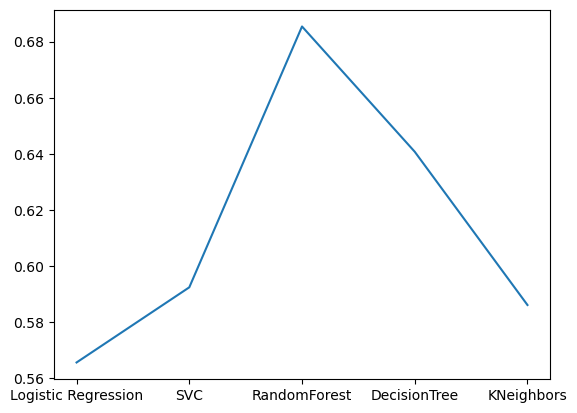

In [64]:
plt.plot(['Logistic Regression','SVC','RandomForest','DecisionTree','KNeighbors'],score)

## Summary
### Problem
Highest Accuracy is of Random Forest is 69.3% which is low because of so many zero(padding) we use to equalize the length of input array 


# Solution

For preprocessing we can use TF-ID Vectorizer to convert string to numeric.

In this we have features instead of array of a tweet

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix

### Defined Train Data from clean string not array

In [66]:
x= df['Cleaned(not array)']

In [67]:
classifier=TfidfVectorizer()
x=classifier.fit_transform(x)

### Test Data

In [68]:
xt=classifier.transform(test['text'].apply(processs_tweet))

### Spliting Train Data Set

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,df['target'], test_size = 0.25)

## Modeling

In [70]:
scorext=[]
print('Logistic Regression')
scorext.append(modelling (log, x_train,x_test,y_train,y_test))
print('SVC')
scorext.append(modelling (support, x_train,x_test,y_train,y_test))
print('RandomForestClassifier')
scorext.append(modelling (RF, x_train,x_test,y_train,y_test))
print('DecisionTreeClassifier')
scorext.append(modelling (DTC, x_train,x_test,y_train,y_test))
print('KNeighborsClassifier')
scorext.append(modelling (Neg, x_train,x_test,y_train,y_test))

Logistic Regression
0.8035714285714286
[[997 268]
 [106 533]]
SVC
0.7962184873949579
[[1008  293]
 [  95  508]]
RandomForestClassifier
0.7710084033613446
[[929 262]
 [174 539]]
DecisionTreeClassifier
0.7300420168067226
[[849 260]
 [254 541]]
KNeighborsClassifier
0.5882352941176471
[[611 292]
 [492 509]]


/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


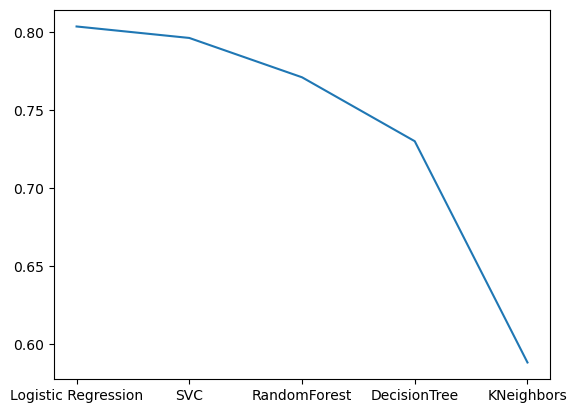

In [71]:
plt.plot(['Logistic Regression','SVC','RandomForest','DecisionTree','KNeighbors'],scorext)

### Highest accuracy is 80% model is same with default parameters but preprocessign technique is differentm

Usiing Support Vector Classifier for submisison

In [72]:
support.fit(x,df['target'])

SVC()

In [73]:
ypred_test= support.predict(xt)

In [74]:
#submission= pd.read_csv('/Users/macbook/Desktop/DATA SCIENCE/Kaggle notebooks/NLP disaster/sample_submission.csv')

In [ ]:
submission = pd.DataFrame({'id':test['id'],'target':ypred_test})
#submission.to_csv('/Users/macbook/Desktop/out.csv',index=False)
submission.to_csv('submission.csv',index=False)

In [ ]:
submission

# Summary

### Alogrithm Results Table :


|Sr. No.|ML Algorithm|Padding Accuracy|TF-IDV Accuracy
|-|-|-|-|
|1|Logistic Regression|56.35%|80.56%
|2|Support Vector Classifier|59.34%|80.51%
|3|Random Forest Classifier|69.32%|78.36%
|4|Decision Tree Classifier|62.76%|73.47%
|5|K-Nearest Neighbors Classfier|58.92%|59.5%

# <center><div style="font-family: Trebuchet MS; background-color: #ADD8E6; color: #00000; padding: 12px; line-height: 1;">Please upvote if you like the work!</div></center><center><div style="font-family: Trebuchet MS; background-color: #ADD8E6; color: #00000; padding: 12px; line-height: 1;">Thank You!</div></center>